In [24]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [25]:
# FITTING FUNCTIONS
def linearODR(B,x):
    return B[0]*x + B[1]

# SCATTER PLOT
def scatterPlot(xdata, ydata, x_label, y_label, color):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(xdata,ydata, color=color, s=25)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def LinearPlotODR(xdata,ydata,error_y,error_x,a,b,function,output,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(output.beta, xdata),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 12}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

In [26]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = 'Week_1'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :13]
df

,$V_{Response} (mV)$,$Time (s)$,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$Ln(T)$,$Ln(T-T_{env})$,$V_{Thermopile} (mV)$,$Ln(V_{Thermopile})$,$Uncertainty (mV)$
0,7.600,10,23.94,0.01,0.69,0.01,34.695652,1567.758921,7.357402,7.148785,2.257,0.814036,0.001
1,8.700,20,29.54,0.01,0.77,0.01,38.363636,1702.903932,7.440090,7.249715,3.107,1.133658,0.001
2,9.030,30,35.80,0.01,0.86,0.01,41.627907,1821.254315,7.507281,7.330441,4.212,1.437938,0.001
3,9.170,40,42.20,0.01,0.94,0.01,44.893617,1938.020880,7.569423,7.404170,5.566,1.716677,0.001
4,9.270,50,48.20,0.01,1.01,0.01,47.722772,2037.963689,7.619706,7.463227,6.841,1.922934,0.001
5,9.350,60,54.00,0.01,1.07,0.01,50.467290,2133.917271,7.665715,7.516823,8.264,2.111909,0.001
6,9.520,90,60.10,0.01,1.14,0.01,52.719298,2211.961527,7.701635,7.558392,9.663,2.268304,0.001
7,9.604,120,66.80,0.01,1.21,0.01,55.206612,2297.477335,7.739567,7.602040,11.455,2.438426,0.001
8,9.667,150,72.00,0.01,1.26,0.01,57.142857,2363.574297,7.767930,7.634518,12.597,2.533459,0.001
9,9.723,180,78.90,0.01,1.33,0.01,59.323308,2437.534623,7.798742,7.669651,14.500,2.674149,0.001


In [27]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

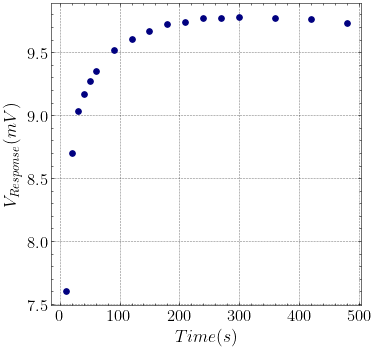

In [5]:
xdata, ydata = df[drop_down_x.value], df[drop_down_y.value]
scatterPlot(xdata,ydata, drop_down_x.value, drop_down_y.value, 'navy')

In [28]:
# FUNCTIONS FOR GENERATING ERRORS
def vir(parameters): #V, I
    return parameters[0]/parameters[1]

def ln(parameters):
    return np.log(parameters[0])

def calc_temperature(parameters): #[R,c]
    return 300*(parameters[0]/4.65)**parameters[1]

In [31]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
df['Error R'] = df.apply(lambda x: uncertainty_var([x['$V_{Variac} (V)$'], x['$I (A)$']], [x['Error V'], x['Error I']], vir), axis=1)
df['Error T'] = df.apply(lambda x: uncertainty_var([x['$R (Ohm)$'], 0.8227572111230458], [x['Error R'], 0.0006755553493553604], calc_temperature), axis=1)
df['Error ln(T)'] = df.apply(lambda x: uncertainty_var([x['$T {K}$']], [x['Error T']], ln), axis=1)
df['Error ln(V)'] = df.apply(lambda x: uncertainty_var([x['$V_{Thermopile} (mV)$']], [x['$Uncertainty (mV)$']], ln), axis=1)
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (m…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', '$V_{Response} (…

In [32]:
df

,$V_{Response} (mV)$,$Time (s)$,$V_{Variac} (V)$,Error V,$I (A)$,Error I,$R (Ohm)$,$T {K}$,$Ln(T)$,$Ln(T-T_{env})$,$V_{Thermopile} (mV)$,$Ln(V_{Thermopile})$,$Uncertainty (mV)$,Error R,Error T,Error ln(T),Error ln(V)
0,7.600,10,23.94,0.01,0.69,0.01,34.695652,1567.758921,7.357402,7.148785,2.257,0.814036,0.001,0.503150,18.824906,0.012008,0.000443
1,8.700,20,29.54,0.01,0.77,0.01,38.363636,1702.903932,7.440090,7.249715,3.107,1.133658,0.001,0.498482,18.364644,0.010785,0.000322
2,9.030,30,35.80,0.01,0.86,0.01,41.627907,1821.254315,7.507281,7.330441,4.212,1.437938,0.001,0.484251,17.637030,0.009684,0.000237
3,9.170,40,42.20,0.01,0.94,0.01,44.893617,1938.020880,7.569423,7.404170,5.566,1.716677,0.001,0.477764,17.225218,0.008888,0.000180
4,9.270,50,48.20,0.01,1.01,0.01,47.722772,2037.963689,7.619706,7.463227,6.841,1.922934,0.001,0.472653,16.911724,0.008299,0.000146
5,9.350,60,54.00,0.01,1.07,0.01,50.467290,2133.917271,7.665715,7.516823,8.264,2.111909,0.001,0.471791,16.767448,0.007858,0.000121
6,9.520,90,60.10,0.01,1.14,0.01,52.719298,2211.961527,7.701635,7.558392,9.663,2.268304,0.001,0.462569,16.373572,0.007402,0.000103
7,9.604,120,66.80,0.01,1.21,0.01,55.206612,2297.477335,7.739567,7.602040,11.455,2.438426,0.001,0.456359,16.088958,0.007003,0.000087
8,9.667,150,72.00,0.01,1.26,0.01,57.142857,2363.574297,7.767930,7.634518,12.597,2.533459,0.001,0.453613,15.946611,0.006747,0.000079
9,9.723,180,78.90,0.01,1.33,0.01,59.323308,2437.534623,7.798742,7.669651,14.500,2.674149,0.001,0.446128,15.652188,0.006421,0.000069


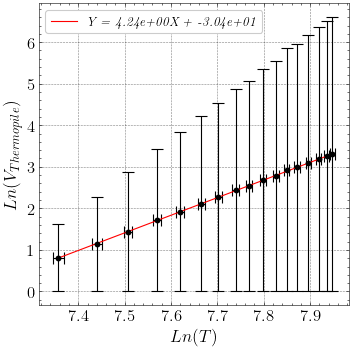

In [17]:
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]
LinearPlotODR(xdata,ydata,error_y,error_x,a,b,linearODR,output,'red',drop_down_x.value,drop_down_y.value)

In [11]:
print('The slope is: (', slope, ' ± ', slope_error, ')')

The slope is: ( 4.220436443969357  ±  0.04198809972364201 )


In [12]:
# DETERMING THE %ERROR
slope_theor = 4
error = abs((slope-slope_theor)/slope_theor)*100
print("Percentage error: ", error, "%")

Percentage error:  5.510911099233917 %
